In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("intents_data_2.csv")
df.head(5)

Text   Intent
0  i want you to predict our value in 2025  predict
1                give the me value of 2030  predict
2        can you predict the value of 2026  predict
3              make the prediction of 2025  predict
4           what will be our value in 2028  predict

In [29]:
df.Intent.value_counts()

predict     100
get         100
set         100
get_past    100
Name: Intent, dtype: int64

In [30]:
df.isna().sum()

Text      0
Intent    0
dtype: int64

In [31]:
intent = df.Intent.map({
    "predict": 0,
    "get": 1,
    "set": 2,
    "get_past": 3
})

intent

0      0
1      0
2      0
3      0
4      0
      ..
395    3
396    3
397    3
398    3
399    3
Name: Intent, Length: 400, dtype: int64

In [32]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [33]:
def preprocess(text):
    doc = nlp(text)

    filter_word = []

    for token in doc:
        # if token.is_stop or token.is_punct:
        #     continue
        if token.is_punct:
            continue
        filter_word.append(token.lemma_)

    return " ".join(filter_word)

In [34]:
text = df.Text.apply(preprocess)

In [35]:
text

0                I want you to predict our value in 2025
1                              give the me value of 2030
2                      can you predict the value of 2026
3                            make the prediction of 2025
4                         what will be our value in 2028
                             ...                        
395    have this value change significantly in the pa...
396         be it possible to access the value from 2021
397    I be interested in valuefor the fiscal year en...
398      what be the performance like at the end of 2021
399         show I the archive datum for value from 2021
Name: Text, Length: 400, dtype: object

In [36]:
df1 = pd.concat([text, intent], axis="columns")

In [37]:
df1

Text  Intent
0              I want you to predict our value in 2025       0
1                            give the me value of 2030       0
2                    can you predict the value of 2026       0
3                          make the prediction of 2025       0
4                       what will be our value in 2028       0
..                                                 ...     ...
395  have this value change significantly in the pa...       3
396       be it possible to access the value from 2021       3
397  I be interested in valuefor the fiscal year en...       3
398    what be the performance like at the end of 2021       3
399       show I the archive datum for value from 2021       3

[400 rows x 2 columns]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
v = CountVectorizer(ngram_range=(1, 2))

x = v.fit_transform(df1.Text.values).toarray()

In [40]:
y = df1.Intent

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=df1.Intent)

## Machine Learning

In [42]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.91      1.00      0.95        20
           2       0.91      1.00      0.95        20
           3       1.00      0.80      0.89        20

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [43]:
# import joblib

# Save the model
# joblib.dump(model, "intent_classification_model")

Text(45.722222222222214, 0.5, 'Truth')

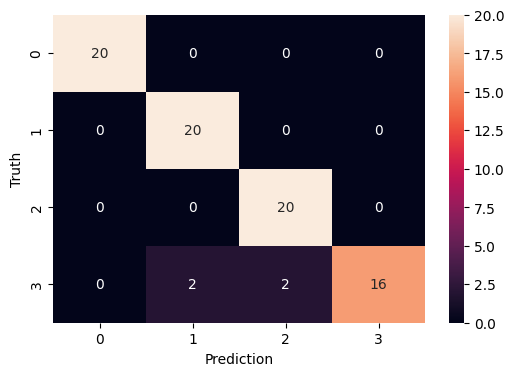

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [45]:
from  sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.85
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.84      0.80      0.82        20
           2       0.83      1.00      0.91        20
           3       0.78      0.70      0.74        20

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [46]:
from  sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9625
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        20
           3       1.00      0.85      0.92        20

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



In [47]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.925
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.95      1.00      0.98        20
           2       1.00      1.00      1.00        20
           3       0.94      0.75      0.83        20

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.92        80



In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9625
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.91      1.00      0.95        20
           2       0.95      1.00      0.98        20
           3       1.00      0.85      0.92        20

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



In [53]:
{
    "predict": 0,
    "get": 1,
    "set": 2,
    "get_past": 3
}

phrases = "get the value of this year"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[1]
[[0.12 0.72 0.08 0.08]]


## Deep Learning